In [5]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
base_path = Path('/content/drive/MyDrive/wyzwanie-solvro-ml-dane/lista1') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

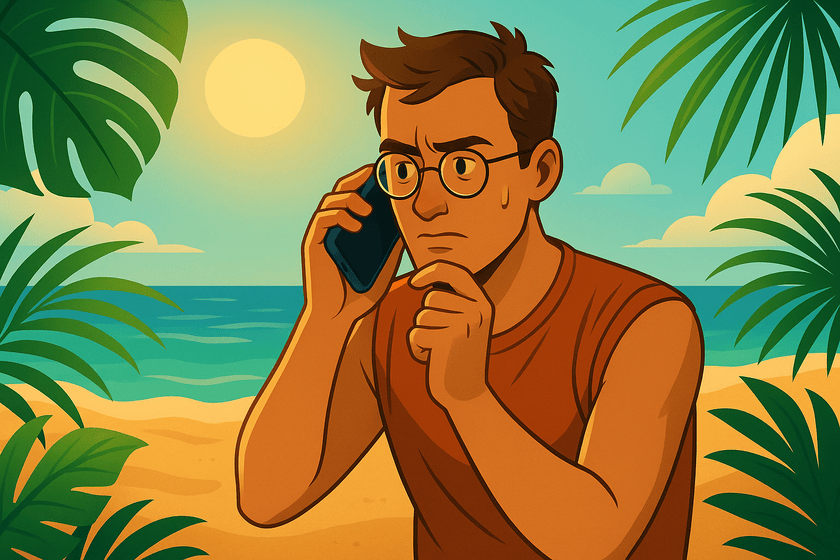

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


### Wymagania:

- ~~~Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)~~~
- ~~~Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)~~~ np. Deck, FamilySize
- ~~~Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)~~~ Sex, nie byłem pewien tytułów to zostawiłem
- ~~~Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych~~~ Są wykresiki :)
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

# import danych

Z góry sorka z polglish

In [6]:
df_raw = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

In [7]:
df_raw.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Przygotowanie danych
## Dodawanie/wyciąganie przydatnych danych/uzupełnianie braków


In [59]:
df = df_raw.copy()
df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.").fillna("Unknown")
#df['Title'].sample(10)
df['CabinNum'] = df['Cabin'].str.extract(r'(\d+)').astype(float).fillna(0)
df['Deck'] = df['Cabin'].str[0].fillna('U')
#df['CabinNum'].sample(10)
df['FamilySize'] = df['SibSp'] + df['Parch']

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()


col2drop = ["Name", "Ticket", "Cabin", "Embarked"]

df.drop(columns=col2drop, inplace=True)



In [61]:
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))


In [64]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Title,0
CabinNum,0
Deck,0


# Wykrywanie wartości skrajnych

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

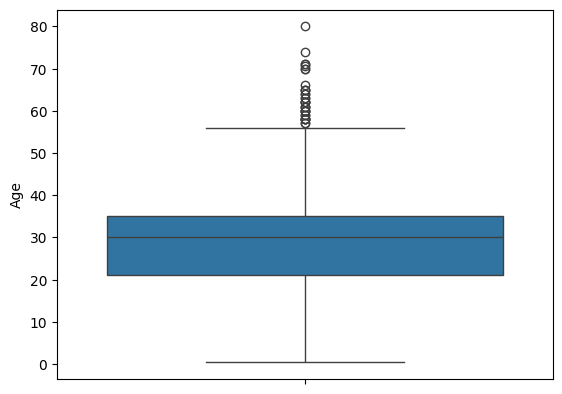

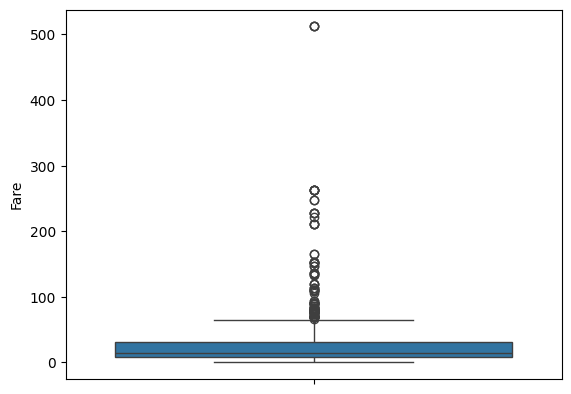

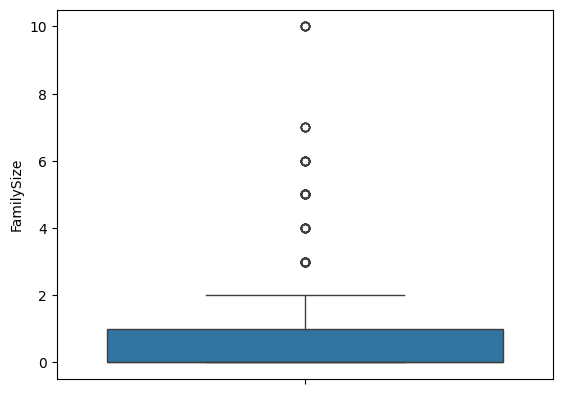

In [71]:
# dane numeryczne
data = ['Age', 'Fare', 'FamilySize']

for value in data:
  sns.boxplot(df[value])
  plt.show()



Nie zrobiłem cabin numbera, bo mijałobo się to z sensem tego rodzaju wykresu :)

Co do reszty to widać że najwiecej było samotnych podróżnych , którzy jak najtaniej chcieli się dostać do Ameryki

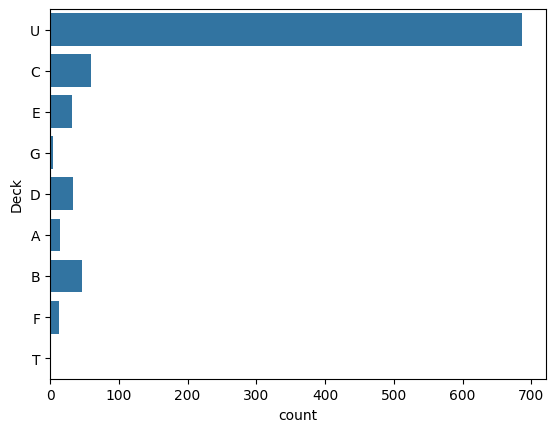

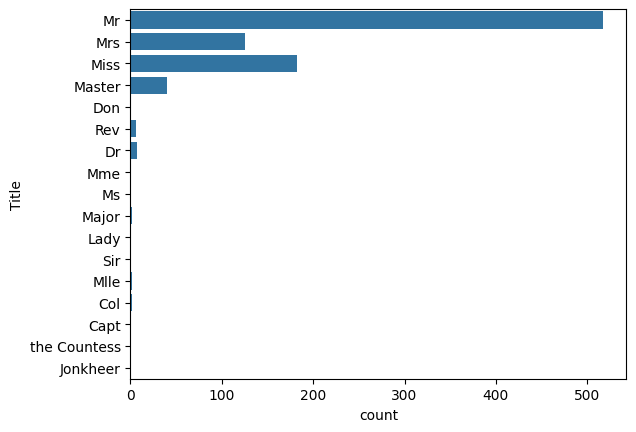

In [95]:
data = ['Deck', 'Title']

for value in data:
  sns.countplot(df[value])
  plt.show()

no tutaj to troche nie siadło z tym deckiem bo tu wychodzi że prawie wszyscy to biedota co mogłoby się zgadzać ze stanem faktycznym.



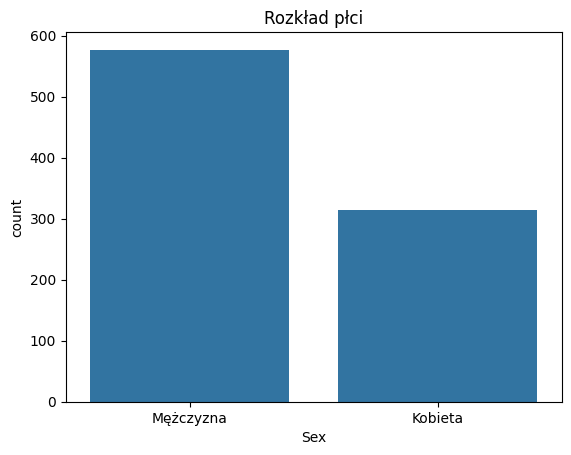

In [75]:
sns.countplot(x='Sex', data=df)
plt.xticks([0,1], ['Mężczyzna','Kobieta'])
plt.title('Rozkład płci')
plt.show()

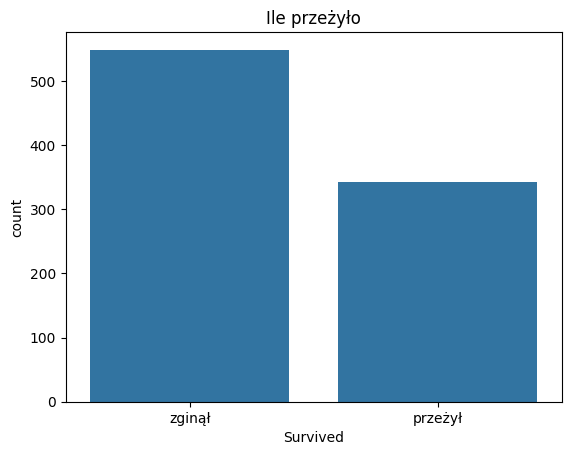

In [79]:
sns.countplot(x='Survived', data=df)
plt.xticks([0,1], ['zginął','przeżył'])
plt.title('Ile przeżyło')
plt.show()

# Imo warto sprawdzić czy nie istnieją zależności
więc sobie porównam 2 cechy gdzie jedna to będzie przeżywalność bo mnie to najbardziej osobiście interesuje



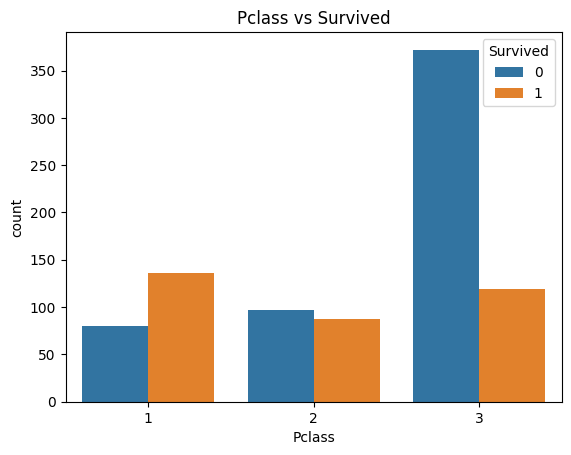

In [91]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass vs Survived')
plt.show()

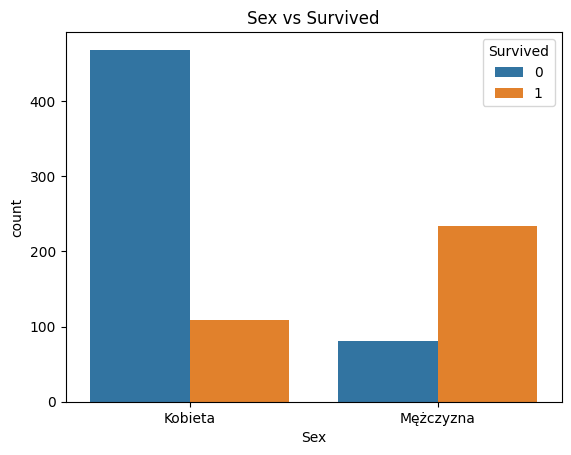

In [94]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.xticks([0,1], ['Kobieta', 'Mężczyzna'])  # dopasuj etykiety do swojego kodowania
plt.title('Sex vs Survived')
plt.show()

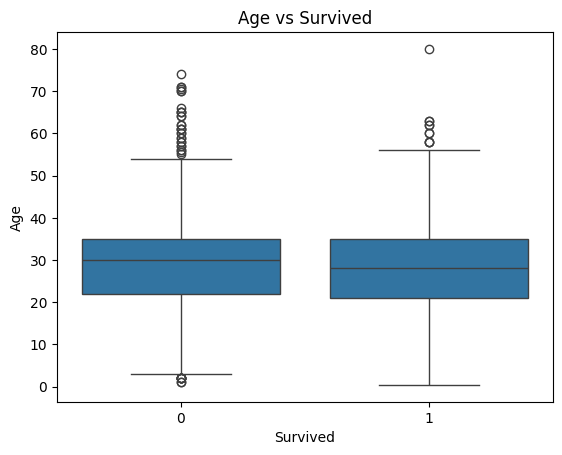

In [84]:
sns.boxplot(x='Survived', y='Age', data=df)

plt.title('Age vs Survived')
plt.show()

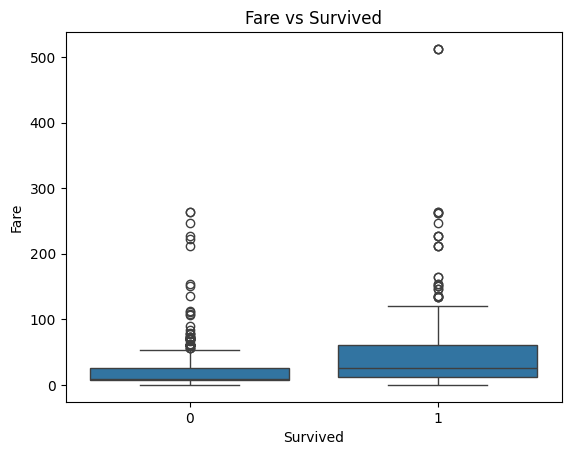

In [83]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survived')
plt.show()

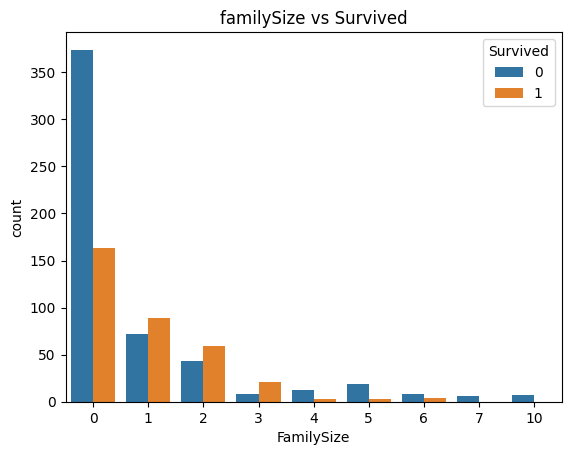

In [86]:
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('familySize vs Survived')
plt.show()

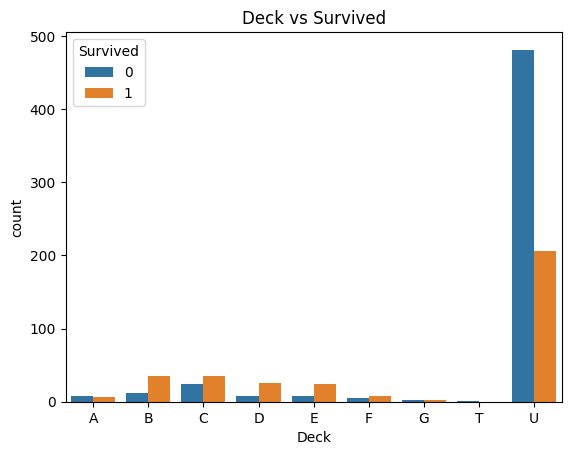

In [87]:
sns.countplot(x='Deck', hue='Survived', data=df, order=sorted(df['Deck'].unique()))
plt.title('Deck vs Survived')
plt.show()

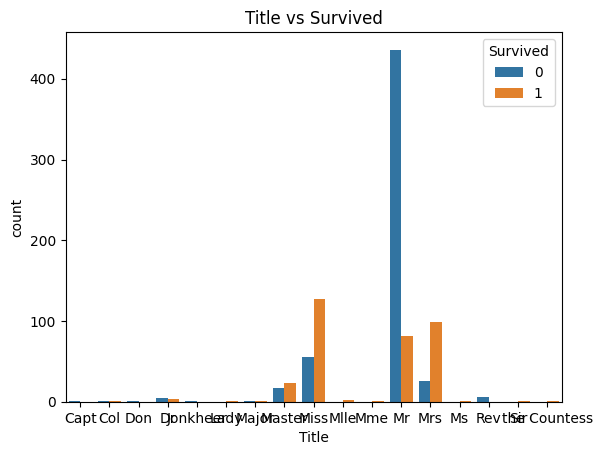

In [88]:
sns.countplot(x='Title', hue='Survived', data=df, order=sorted(df['Title'].unique()))
plt.title('Title vs Survived')
plt.show()

czyli
ci co zapłacili więcej mieli większą szanse na przeżycie,
tak samo młodsim mężczyźni, oraz ci co płynęli samotnie


lub ci co żyli na deckach B/D/E